In [17]:
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
x = np.random.uniform(0,1,(30)).reshape(30,1)
epsilon = np.random.normal(0, 0.07,30).reshape(30,1)
gx = ((np.sin(2*np.pi*x))**2) + epsilon 

In [3]:
#K = 1-18, 
#For finding model parameters 
def fit(k, x, y):
    A = []
    
    for i in range(1,k+1):
        A.append(np.sin(i*x*np.pi))
        
    A = np.concatenate(A, axis = 1)
    
    #smallest indices first, largest indices last
    params = np.linalg.inv(A.T@A)@(A.T@y)
    return params
    

In [4]:
#model parameters for each K
P1 = fit(1,x,gx)
P2 = fit(2,x,gx)
P3 = fit(3,x,gx)
P4 = fit(4,x,gx)
P5 = fit(5,x,gx)
P6 = fit(6,x,gx)
P7 = fit(7,x,gx)
P8 = fit(8,x,gx)
P9 = fit(9,x,gx)
P10 = fit(10,x,gx)
P11 = fit(11,x,gx)
P12 = fit(12,x,gx)
P13 = fit(13,x,gx)
P14 = fit(14,x,gx)
P15 = fit(15,x,gx)
P16 = fit(16,x,gx)
P17 = fit(17,x,gx)
P18 = fit(18,x,gx)

In [5]:
#Constructing model from parameters found from step before, returns prediction 
def model(parameters, x, n):
    prediction = np.zeros((n,1))
    for i in range(len(parameters)):
        prediction += parameters[i][0]*np.sin((i+1)*np.pi*x)
    return prediction 

In [6]:
#Calculating the model prediction for each K  
#For calculating MSE
yhat1 = model(P1,x,30)
yhat2 = model(P2,x,30)
yhat3 = model(P3,x,30)
yhat4 = model(P4,x,30)
yhat5 = model(P5,x,30)
yhat6 = model(P6,x,30)
yhat7 = model(P7,x,30)
yhat8 = model(P8,x,30)
yhat9 = model(P9,x,30)
yhat10 = model(P10,x,30)
yhat11 = model(P11,x,30)
yhat12 = model(P12,x,30)
yhat13 = model(P13,x,30)
yhat14 = model(P14,x,30)
yhat15 = model(P15,x,30)
yhat16 = model(P16,x,30)
yhat17 = model(P17,x,30)
yhat18 = model(P18,x,30)

In [7]:
#Mean squared error function
def MSEnp(y,yhat,n):
    sqrdiff = (y - yhat)**2
    SSE = np.sum(sqrdiff)
    meanSE = SSE/n
    return meanSE

In [8]:
#calculating log MSE train 
K = np.arange(1,19,1).reshape(18,1)
MSEtrain = [MSEnp(gx,yhat1,30),MSEnp(gx,yhat2,30),MSEnp(gx,yhat3,30),MSEnp(gx,yhat4,30),MSEnp(gx,yhat5,30),MSEnp(gx,yhat6,30),MSEnp(gx,yhat7,30),MSEnp(gx,yhat8,30),MSEnp(gx,yhat9,30),MSEnp(gx,yhat10,30),MSEnp(gx,yhat11,30),MSEnp(gx,yhat12,30),MSEnp(gx,yhat13,30),MSEnp(gx,yhat14,30),MSEnp(gx,yhat15,30),MSEnp(gx,yhat16,30),MSEnp(gx,yhat17,30),MSEnp(gx,yhat18,30)]
MSEtrain = np.array(MSEtrain).reshape(18,1)
MSEtrain = np.log(MSEtrain)

Text(0.5, 0, 'K')

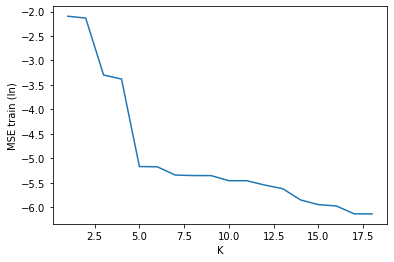

In [9]:
#ploting log MSE and K
plt.plot(K,MSEtrain)
plt.ylabel('MSE train (ln)')
plt.xlabel('K')

#seems to be a decreasing function, with increasing basis

In [10]:
#For plots
xrange = np.arange(0,1,0.01).reshape(100,1)

In [11]:
yhat1r = model(P1,xrange,100)
yhat2r = model(P2,xrange,100)
yhat3r = model(P3,xrange,100)
yhat4r = model(P4,xrange,100)
yhat5r = model(P5,xrange,100)
yhat6r = model(P6,xrange,100)
yhat7r = model(P7,xrange,100)
yhat8r = model(P8,xrange,100)
yhat9r = model(P9,xrange,100)
yhat10r = model(P10,xrange,100)
yhat11r = model(P11,xrange,100)
yhat12r = model(P12,xrange,100)
yhat13r = model(P13,xrange,100)
yhat14r = model(P14,xrange,100)
yhat15r = model(P15,xrange,100)
yhat16r = model(P16,xrange,100)
yhat17r = model(P17,xrange,100)
yhat18r = model(P18,xrange,100)

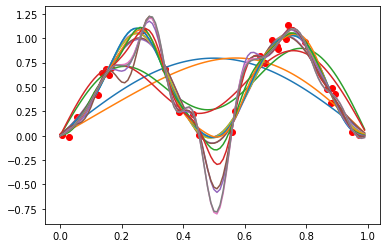

In [12]:
plt.plot(x,gx,'ro', xrange, yhat1r, xrange, yhat2r, xrange, yhat3r, xrange, yhat4r, xrange, yhat5r, xrange, yhat6r, xrange, yhat7r, xrange, yhat8r, xrange, yhat9r, xrange, yhat10r, xrange, yhat11r, xrange, yhat12r, xrange, yhat13r, xrange, yhat14r, xrange, yhat15r, xrange, yhat16r, xrange, yhat17r, xrange, yhat18r )

[[-1.93114944]
 [-1.91794478]
 [-3.32554884]
 [-3.21154973]
 [-4.97213472]
 [-4.95620882]
 [-5.08284836]
 [-5.06830226]
 [-5.07076268]
 [-4.93247847]
 [-4.92300133]
 [-4.86987174]
 [-4.60784391]
 [-3.95410131]
 [-3.20222092]
 [-3.16972992]
 [-2.87752502]
 [-2.90231937]]


Text(0, 0.5, 'MSE test (ln)')

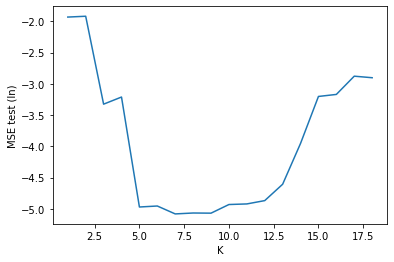

In [13]:
#Test set 
xtest = np.random.uniform(0,1,(1000)).reshape(1000,1)
epsilontest = np.random.normal(0, 0.07,1000).reshape(1000,1)
gxtest = ((np.sin(2*np.pi*xtest))**2) + epsilontest 

yhat1test = model(P1,xtest,1000)
yhat2test = model(P2,xtest,1000)
yhat3test = model(P3,xtest,1000)
yhat4test = model(P4,xtest,1000)
yhat5test = model(P5,xtest,1000)
yhat6test = model(P6,xtest,1000)
yhat7test = model(P7,xtest,1000)
yhat8test = model(P8,xtest,1000)
yhat9test = model(P9,xtest,1000)
yhat10test = model(P10,xtest,1000)
yhat11test = model(P11,xtest,1000)
yhat12test = model(P12,xtest,1000)
yhat13test = model(P13,xtest,1000)
yhat14test = model(P14,xtest,1000)
yhat15test = model(P15,xtest,1000)
yhat16test = model(P16,xtest,1000)
yhat17test = model(P17,xtest,1000)
yhat18test = model(P18,xtest,1000)

MSEtest = [MSEnp(gxtest,yhat1test,1000),MSEnp(gxtest,yhat2test,1000),MSEnp(gxtest,yhat3test,1000),MSEnp(gxtest,yhat4test,1000),MSEnp(gxtest,yhat5test,1000),MSEnp(gxtest,yhat6test,1000),MSEnp(gxtest,yhat7test,1000),MSEnp(gxtest,yhat8test,1000),MSEnp(gxtest,yhat9test,1000),MSEnp(gxtest,yhat10test,1000),MSEnp(gxtest,yhat11test,1000),MSEnp(gxtest,yhat12test,1000),MSEnp(gxtest,yhat13test,1000),MSEnp(gxtest,yhat14test,1000),MSEnp(gxtest,yhat15test,1000),MSEnp(gxtest,yhat16test,1000),MSEnp(gxtest,yhat17test,1000),MSEnp(gxtest,yhat18test,1000)]
MSEtest = np.array(MSEtest).reshape(18,1)
MSEtest = np.log(MSEtest)

print(MSEtest)

plt.plot(K,MSEtest)
plt.xlabel('K')
plt.ylabel('MSE test (ln)')

#No longer a decreasing function because we learnt noise.

Text(0.5, 1.0, 'Average of 100 runs')

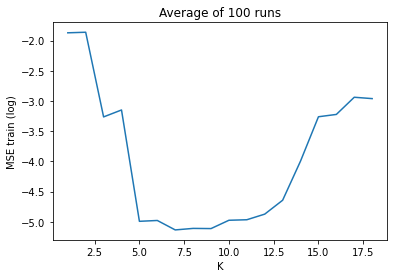

In [14]:
#Taking average MSE of 100 runs instead of 1 run.
#Training set
runs = 100
MSEtrain_avg = np.zeros((18,1))
for i in range(runs):
    x = np.random.uniform(0,1,(30)).reshape(30,1)
    epsilon = np.random.normal(0, 0.07,30).reshape(30,1)
    gx = ((np.sin(2*np.pi*x))**2) + epsilon 
    
    yhat1 = model(P1,x,30)
    yhat2 = model(P2,x,30)
    yhat3 = model(P3,x,30)
    yhat4 = model(P4,x,30)
    yhat5 = model(P5,x,30)
    yhat6 = model(P6,x,30)
    yhat7 = model(P7,x,30)
    yhat8 = model(P8,x,30)
    yhat9 = model(P9,x,30)
    yhat10 = model(P10,x,30)
    yhat11 = model(P11,x,30)
    yhat12 = model(P12,x,30)
    yhat13 = model(P13,x,30)
    yhat14 = model(P14,x,30)
    yhat15 = model(P15,x,30)
    yhat16 = model(P16,x,30)
    yhat17 = model(P17,x,30)
    yhat18 = model(P18,x,30)

    MSEtrain = [MSEnp(gx,yhat1,30),MSEnp(gx,yhat2,30),MSEnp(gx,yhat3,30),MSEnp(gx,yhat4,30),MSEnp(gx,yhat5,30),MSEnp(gx,yhat6,30),MSEnp(gx,yhat7,30),MSEnp(gx,yhat8,30),MSEnp(gx,yhat9,30),MSEnp(gx,yhat10,30),MSEnp(gx,yhat11,30),MSEnp(gx,yhat12,30),MSEnp(gx,yhat13,30),MSEnp(gx,yhat14,30),MSEnp(gx,yhat15,30),MSEnp(gx,yhat16,30),MSEnp(gx,yhat17,30),MSEnp(gx,yhat18,30)]
    MSEtrain = np.array(MSEtrain).reshape(18,1)
    MSEtrain_avg += MSEtrain 

MSEtrain_avg = np.log(MSEtrain_avg/runs)

plt.plot(K, MSEtrain_avg)
plt.xlabel('K')
plt.ylabel('MSE train (log)')
plt.title('Average of 100 runs')

Text(0.5, 1.0, 'Average of 100 runs')

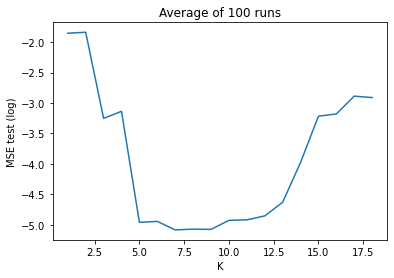

In [15]:
#Taking average MSE of 100 runs instead of 1 run.
#Test set
runs = 100
MSEtest_avg = np.zeros((18,1))
for i in range(runs):
    xtest = np.random.uniform(0,1,(1000)).reshape(1000,1)
    epsilontest = np.random.normal(0, 0.07,1000).reshape(1000,1)
    gxtest = ((np.sin(2*np.pi*xtest))**2) + epsilontest 
    
    yhat1test = model(P1,xtest,1000)
    yhat2test = model(P2,xtest,1000)
    yhat3test = model(P3,xtest,1000)
    yhat4test = model(P4,xtest,1000)
    yhat5test = model(P5,xtest,1000)
    yhat6test = model(P6,xtest,1000)
    yhat7test = model(P7,xtest,1000)
    yhat8test = model(P8,xtest,1000)
    yhat9test = model(P9,xtest,1000)
    yhat10test = model(P10,xtest,1000)
    yhat11test = model(P11,xtest,1000)
    yhat12test = model(P12,xtest,1000)
    yhat13test = model(P13,xtest,1000)
    yhat14test = model(P14,xtest,1000)
    yhat15test = model(P15,xtest,1000)
    yhat16test = model(P16,xtest,1000)
    yhat17test = model(P17,xtest,1000)
    yhat18test = model(P18,xtest,1000)

    MSEtest = [MSEnp(gxtest,yhat1test,1000),MSEnp(gxtest,yhat2test,1000),MSEnp(gxtest,yhat3test,1000),MSEnp(gxtest,yhat4test,1000),MSEnp(gxtest,yhat5test,1000),MSEnp(gxtest,yhat6test,1000),MSEnp(gxtest,yhat7test,1000),MSEnp(gxtest,yhat8test,1000),MSEnp(gxtest,yhat9test,1000),MSEnp(gxtest,yhat10test,1000),MSEnp(gxtest,yhat11test,1000),MSEnp(gxtest,yhat12test,1000),MSEnp(gxtest,yhat13test,1000),MSEnp(gxtest,yhat14test,1000),MSEnp(gxtest,yhat15test,1000),MSEnp(gxtest,yhat16test,1000),MSEnp(gxtest,yhat17test,1000),MSEnp(gxtest,yhat18test,1000)]
    MSEtest = np.array(MSEtest).reshape(18,1)
    MSEtest_avg += MSEtest 

MSEtest_avg = np.log(MSEtest_avg/runs)

plt.plot(K, MSEtest_avg)
plt.xlabel('K')
plt.ylabel('MSE test (log)')
plt.title('Average of 100 runs')